**Autor: Gustavo Henrique Reis de Araújo Lima - @ghofxaos**

**(feito em Julia 1.4)**

**Última atualização: 19/04/2020**

# 1. CINEMÁTICA

## 1.2 Velocidade ($\vec{v}$)

Diz-se que um objeto se movimenta em relação a um certo ponto de referência, quando sua posição em relação a este ponto de referência varia com o passar do tempo. A grandeza que representa a variação da posição com o tempo é uma grandeza vetorial chamada velocidade e representada como $\vec{v}$. 

Na imagem abaixo, temos 3 objetos A, B e C que se movimentam em relação a um observador O. Todas as medidas de posição serão, inicialmente, feitas em relação ao observador. Os objetos A, B e C partem de suas respectivas posições iniciais $\vec{s_{iA}},\vec{s_{iB}}$ e $\vec{s_{iC}}$, e após um certo intervalo de tempo $\Delta t$, chegam às suas respectivas posições finais $\vec{s_{fA}}, \vec{s_{fB}}$ e $\vec{s_{fC}}$. O intervalo de tempo $\Delta t$ é o tempo que passa entre o instante de tempo inicial $t_i$ e o instante de tempo final $t_f$: 

$$\Delta t = t_f - t_i.$$

┌ Info: Saved animation to 
│   fn = /home/ghralima/Codes/Notebooks/mecanica/tmp.gif
└ @ Plots /home/ghralima/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/ghralima/Codes/Notebooks/mecanica/tmp.gif")
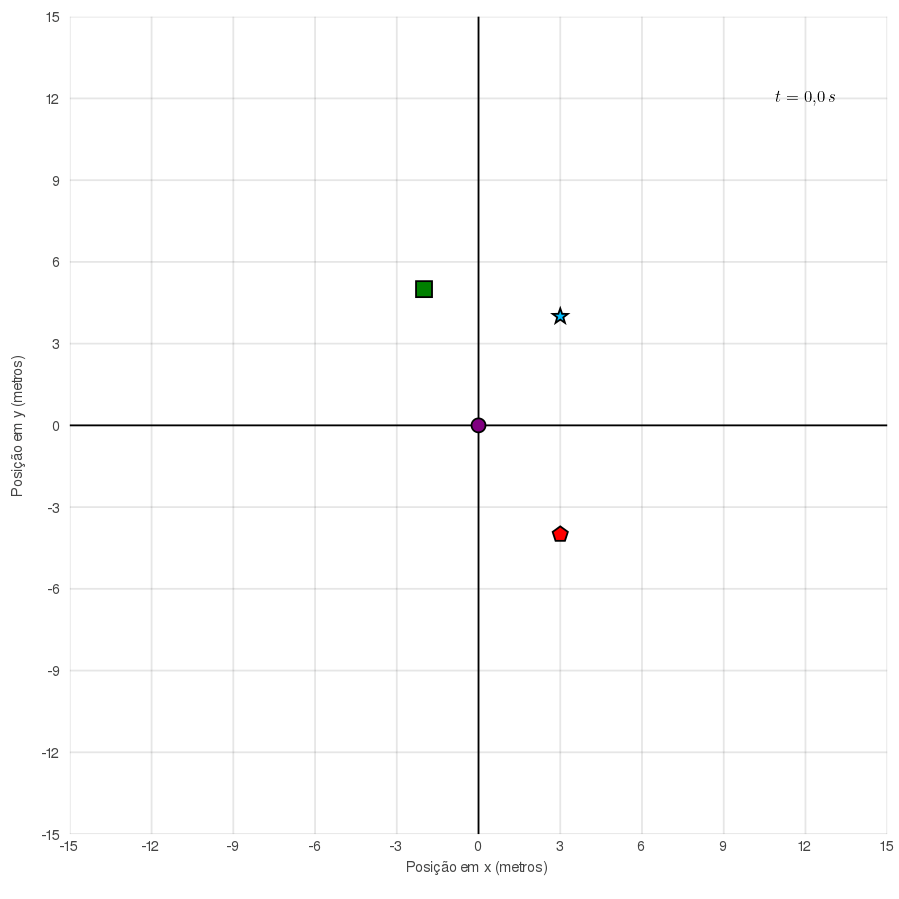

In [2]:
#carregando bibliotecas utilizadas
using Plots
using LaTeXStrings

#definindo características do gráfico
default(size = [900,900], aspect_ratio = :equal, grid = true, markersize = 8, framestyle = :zerolines)

#definindo as posições x e y do objeto A
xA = range(3,11, length = 100)
yA = range(4,8, length = 100)
A = [xA,yA,:star,:deepskyblue,"A"] #vetor com as posições de A (x,y), símbolo, cor e nome do objeto

#definindo as posições x e y do objeto B
xB = range(-2,-6, length = 100)
yB = range(5, 13, length = 100)
B = [xB,yB,:square,:green,"B"] #vetor com as posições de A (x,y), símbolo, cor e nome do objeto

#definindo as posições x e y do objeto C
xC = range(3, -1, length = 100)
yC = range(-4, -10, length = 100)
C = [xC,yC,:pentagon,:red,"C"] #vetor com as posições de A (x,y), símbolo, cor e nome do objeto.

#definindo posição do observador O
O = [[0],[0],:circle,:purple,"O"]

#string com os nomes de cada um dos eixos no gráfico
ylabel = "Posição em y (metros)"
xlabel = "Posição em x (metros)"

#definindo instantes de tempo
tempo = range(0, 2, length = 100)

#preparando animação
@gif for i = 1:3:100
        strtempo = latexstring("t = ", round(tempo[i]; digits = 2), "\\, s")
        strtempo = replace(strtempo, "." => ",\\!")
        ann = [(12,12, text(strtempo, pointsize = 12))]
        #println(ann)
        scatter(O[1],O[2], xaxis = (xlabel, (-15,15), -15:3:15, font(10)),
        yaxis = (ylabel, (-15,15), -15:3:15, font(10)), legend = :none, 
        markershape = O[3], color = O[4], ann = ann)
    
        scatter!([A[1][i]],[A[2][i]], markershape = A[3], color = A[4])
        plot!(A[1][1:i], A[2][1:i], lw = 3, color = A[4], linestyle = :dash, linealpha = 0.5)
    
        scatter!([B[1][i]],[B[2][i]], markershape = B[3], color = B[4])
        plot!(B[1][1:i], B[2][1:i], lw = 3, color = B[4], linestyle = :dash, linealpha = 0.5)
    
        scatter!([C[1][i]],[C[2][i]], markershape = C[3], color = C[4])
        plot!(C[1][1:i], C[2][1:i], lw = 3, color = C[4], linestyle = :dash, linealpha = 0.5)  
end



O (vetor) deslocamento $\vec{\Delta s}$ de um objeto representa o quanto sua posição variou em relação ao um determinado ponto de referência. Para calcular o deslocamento de um objeto utiliza-se: 

$$ \vec{\Delta s} = \vec{s_f} - \vec{s_i},$$

ou seja, o deslocamento é a diferença entre a posição final $\vec{s_f}$ e a posição inicial $\vec{s_i}$. A figura abaixo mostra o deslocamento de cada um dos objetos em relação ao observador O. 

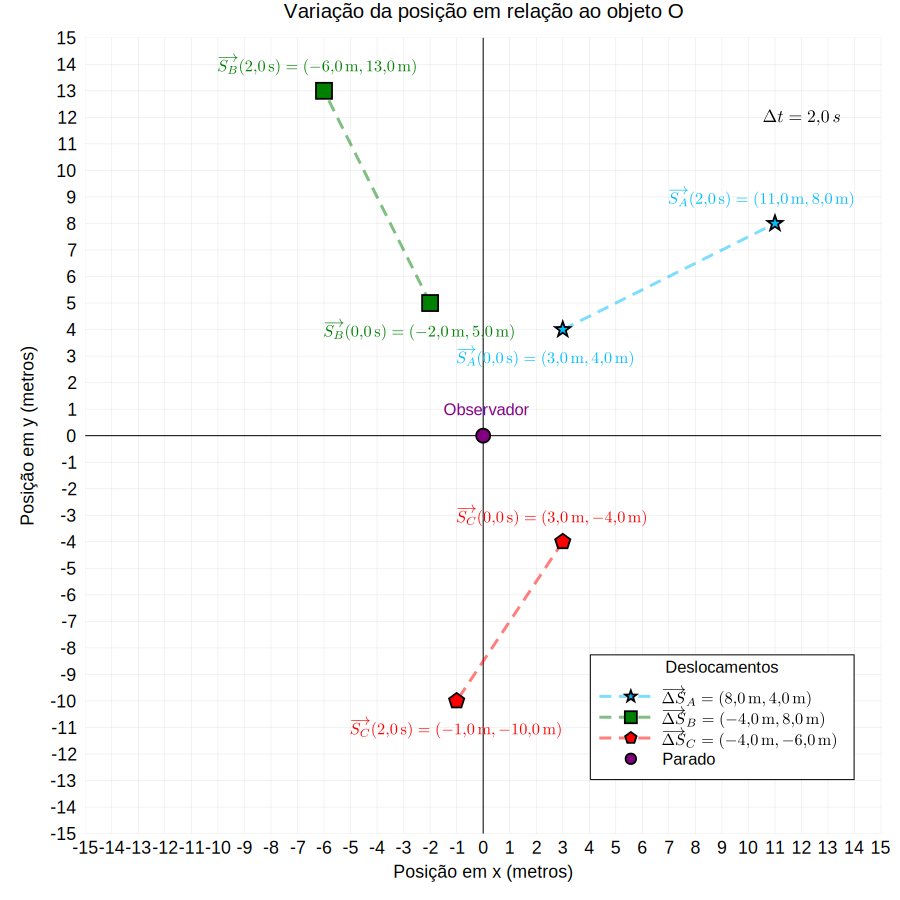

In [6]:
#características gerais do gráfico
default(size = [900,900], aspect_ratio = :equal, grid = true, markersize = 8, framestyle = :zerolines)

#função para criar as strings em LaTeX utilizadas nas anotações do gráfico
#como entrada para a função é necessário um vetor X contendo posições X e Y do objeto, símbolo do objeto,
#cor do objeto e nome do objeto, ti é o instante de tempo inicial e tf o instante de tempo final
function StringPos(X::Array,ti::Float64,tf::Float64)::Tuple
    strpos = (latexstring("\\overrightarrow{S_{",X[5],"}} (", round(ti;digits = 2),"\\, \\mathrm{s}) = (", 
            round(X[1][1], digits = 2), "\\, \\mathrm{m}, ", round(X[2][1], digits = 2), "\\, \\mathrm{m})"),
        latexstring("\\overrightarrow{S_",X[5],"} (", round(tf;digits = 2),"\\, \\mathrm{s}) = (", 
            round(X[1][end], digits = 2), "\\, \\mathrm{m}, ", round(X[2][end],digits = 2), "\\, \\mathrm{m})"),
        latexstring("\\overrightarrow{\\Delta S}_",X[5]," = (", round(X[1][end]-X[1][1], digits = 2),"\\, \\mathrm{m},",
            round(X[2][end]-X[2][1], digits = 2),"\\, \\mathrm{m})"))
    
    strpos = replace(strpos[1], "."  => ",\\!"), replace(strpos[2], "." => ",\\!"), replace(strpos[3], "." => ",\\!")
    return strpos
end

#gerando as strings com as posições iniciais e finais de cada um dos pontos
strA = StringPos(A,tempo[1],tempo[end])    
ann_A = [(xA[1]-4, yA[1]-1, text(strA[1],halign = :left, pointsize = 11, color = A[4])),
    (xA[end]-4, yA[end]+1, text(strA[2],halign = :left, pointsize = 11, color = A[4]))]

strB = StringPos(B, tempo[1],tempo[end])
ann_B = [(xB[1]-4, yB[1]-1, text(strB[1],halign = :left, pointsize = 11, color = B[4])),
    (xB[end]-4, yB[end]+1, text(strB[2],halign = :left, pointsize = 11, color = B[4]))]

strC = StringPos(C, tempo[1], tempo[end])
ann_C = [(xC[1]-4, yC[1]+1, text(strC[1], halign = :left, pointsize = 11, color = C[4])),
    (xC[end]-4, yC[end]-1, text(strC[2],halign = :left, pointsize = 11, color = C[4]))]

ann_O = [(-1.5,1, text("Observador", halign = :left, pointsize = 11, color = O[4]))]

#gerando string com o intervalo de tempo
strt = latexstring("\\Delta t = ", round(tempo[end]-tempo[1]; digits = 2), "\\,s")
strt = replace(strt, "." => ",\\!")
ann_t = [(12,12, text(strt, pointsize = 12))]

#desenhando figura com anotações
plot([A[1][1],A[1][end]],[A[2][1],A[2][end]],xaxis = (xlabel,(-15,15),-15:1:15, font(12)), 
    yaxis = (ylabel, (-15,15), -15:1:15, font(12)), markershape = A[3], color = A[4], 
    lw = 3, ls = :dash, linealpha = 0.5, label = strA[3])
plot!([B[1][1],B[1][end]],[B[2][1],B[2][end]], markershape = B[3], color = B[4], 
    lw = 3, ls = :dash, linealpha = 0.5, label = strB[3])
plot!([C[1][1],C[1][end]],[C[2][1],C[2][end]], markershape = C[3], color = C[4], 
    lw = 3, ls = :dash, linealpha = 0.5, label = strC[3])
scatter!(O[1],O[2], markershape = O[3], color = O[4], label = "Parado", 
    title = "Variação da posição em relação ao objeto O", legendfontsize = 11, 
    legendtitle = "Deslocamentos\n", legend = :bottomright)

annotate!(ann_A)
annotate!(ann_B)
annotate!(ann_C)
annotate!(ann_O)
annotate!(ann_t)


Podemos notar que utilizamos dois valores para descrever os deslocamentos de cada um dos objetos: utilizamos um deslocamento na direção horizontal, para esquerda (negativo) ou para a direita (positivo); e um deslocamento na direção vertical; para baixo (negativo) ou para cima (positivo). São necessários três valores distintos para descrever o deslocamento no espaço tridimensional. 

Conhecendo o deslocamento $\vec{\Delta s}$ de um objeto e o intervalo de tempo $\Delta t$ durante o qual ocorreu este deslocamento, é possível calcular a velocidade média $\vec{v}_{\mathrm{med}}$ do objeto durante o intervalo $\Delta t$:

$$\overrightarrow{v}_{\mathrm{med}} = \frac{\overrightarrow{\Delta s}}{\Delta t}.$$

In [11]:
#calculado as velocidades de cada um dos objetos
vA = [(A[1][end]-A[1][1])/(tempo[end] - tempo[1]),(A[2][end]-A[2][1])/(tempo[end] - tempo[1])]
vB = [(B[1][end]-B[1][1])/(tempo[end] - tempo[1]),(B[2][end]-B[2][1])/(tempo[end] - tempo[1])]
vC = [(C[1][end]-C[1][1])/(tempo[end] - tempo[1]),(C[2][end]-C[2][1])/(tempo[end] - tempo[1])]

#criando strings descrevendo o deslocamento do objeto A
deslocAstr = string("O objeto ",A[5]," se deslocou em relação ao objeto ",O[5],": \n", 
    round(A[1][end]-A[1][1], digits = 2)," m na direção x, e ", 
    round(A[2][end]-A[2][1], digits = 2), " m na direção y, em um intervalo de tempo Δt = ", 
    round(tempo[end]-tempo[1]; digits = 2)," s.\n")

#criando string descrevendo a velocidade média do objeto A
vAstr = string("A velocidade média de ",A[5]," em relação ao objeto ",O[5]," no intervalo acima é de:\n",
    vA[1]," m/s na direção x, e ", vA[2]," m/s na direção y.\n\n")

#criando strings descrevendo o deslocamento do objeto B
deslocBstr = string("O objeto ",B[5]," se deslocou em relação ao objeto ",O[5],": \n", 
    round(B[1][end]-B[1][1], digits = 2)," m na direção x, e ", 
    round(B[2][end]-B[2][1], digits = 2), " m na direção y, em um intervalo de tempo Δt = ", 
    round(tempo[end]-tempo[1]; digits = 2)," s.\n")

#criando string descrevendo a velocidade média do objeto B
vBstr = string("A velocidade média de ",B[5]," em relação ao objeto ",O[5]," no intervalo acima é de:\n",
    vB[1]," m/s na direção x, e ", vB[2]," m/s na direção y.\n\n")

#criando strings descrevendo o deslocamento do objeto C
deslocCstr = string("O objeto ",C[5]," se deslocou em relação ao objeto ",O[5],": \n", 
    round(C[1][end]-C[1][1], digits = 2)," m na direção x, e ", 
    round(C[2][end]-C[2][1], digits = 2), " m na direção y, em um intervalo de tempo Δt = ", 
    round(tempo[end]-tempo[1]; digits = 2)," s.\n")

#criando string descrevendo a velocidade média do objeto C
vCstr = string("A velocidade média de ",C[5]," em relação ao objeto ",O[5]," no intervalo acima é de:\n",
    vC[1]," m/s na direção x, e ", vC[2]," m/s na direção y.\n")

#escrevendo strings na tela
println(deslocAstr)
println(vAstr)
println(deslocBstr)
println(vBstr)
println(deslocCstr)
println(vCstr)

O objeto A se deslocou em relação ao objeto O: 
8.0 m na direção x, e 4.0 m na direção y, em um intervalo de tempo Δt = 2.0 s.

A velocidade média de A em relação ao objeto O no intervalo acima é de:
4.0 m/s na direção x, e 2.0 m/s na direção y.


O objeto B se deslocou em relação ao objeto O: 
-4.0 m na direção x, e 8.0 m na direção y, em um intervalo de tempo Δt = 2.0 s.

A velocidade média de B em relação ao objeto O no intervalo acima é de:
-2.0 m/s na direção x, e 4.0 m/s na direção y.


O objeto C se deslocou em relação ao objeto O: 
-4.0 m na direção x, e -6.0 m na direção y, em um intervalo de tempo Δt = 2.0 s.

A velocidade média de C em relação ao objeto O no intervalo acima é de:
-2.0 m/s na direção x, e -3.0 m/s na direção y.



O que deve acontece com os deslocamentos e as velocidades se mudarmos o ponto de referência?

Vimos anteriormente, que o vetor posição depende do referencial. Mas o que deve acontecer com o deslocamento? Vamos adicionar um novo ponto de referência e ver o que acontece!

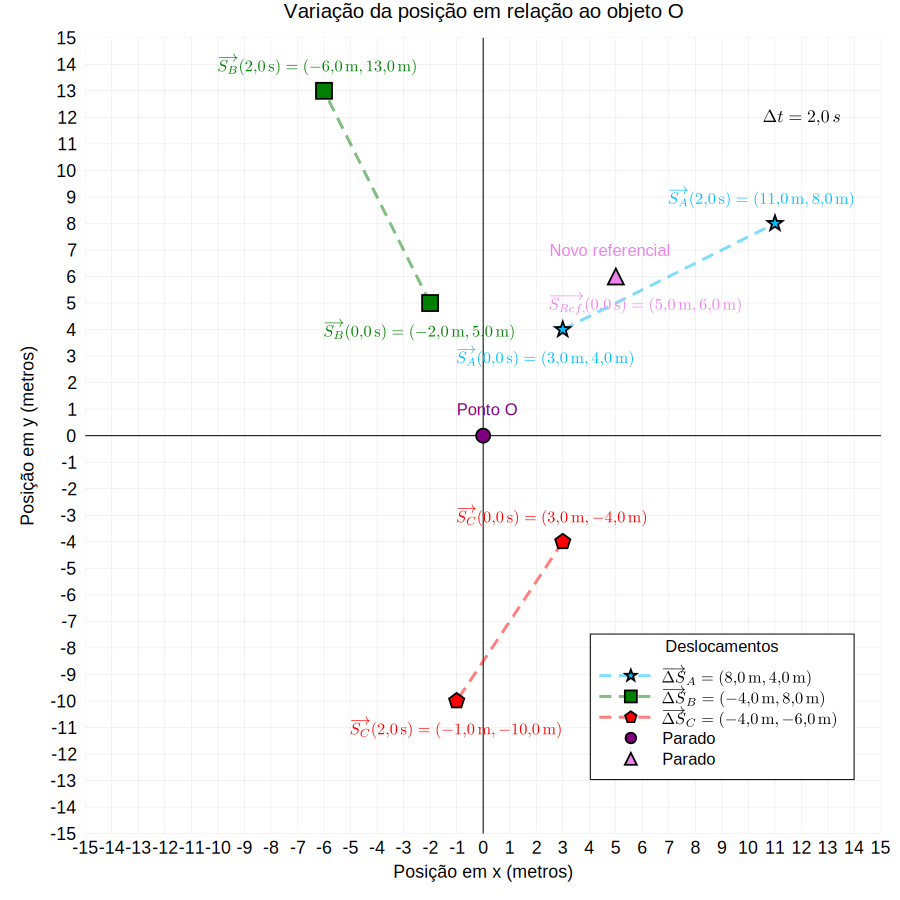

In [13]:
#definindo ponto de referência (posição x, posição y, símbolo, cor, "identificação")
PRef = [[5],[6],:utriangle,:violet,"Ref."]

#criando strings de posição para o ponto de referência
strRef = StringPos(PRef,tempo[1],tempo[end]) 

#definindo anotações no gráfico
ann_Ref = [(PRef[1][1]-2.5,PRef[2][1]+1, text("Novo referencial", halign = :left, pointsize = 11, color = PRef[4])),
    (PRef[1][1]-2.5, PRef[2][1]-1, text(strRef[1], halign = :left, pointsize = 11, color = PRef[4]))]

ann_O = [(-1,1, text("Ponto O", halign = :left, pointsize = 11, color = O[4]))]

#desenhando gráficos
plot([A[1][1],A[1][end]],[A[2][1],A[2][end]],xaxis = (xlabel,(-15,15),-15:1:15, font(12)), 
    yaxis = (ylabel, (-15,15), -15:1:15, font(12)), markershape = A[3], color = A[4], 
    lw = 3, ls = :dash, linealpha = 0.5, label = strA[3])
plot!([B[1][1],B[1][end]],[B[2][1],B[2][end]], markershape = B[3], color = B[4], 
    lw = 3, ls = :dash, linealpha = 0.5, label = strB[3])
plot!([C[1][1],C[1][end]],[C[2][1],C[2][end]], markershape = C[3], color = C[4], 
    lw = 3, ls = :dash, linealpha = 0.5, label = strC[3])
scatter!(O[1],O[2], markershape = O[3], color = O[4], label = "Parado", 
    title = "Variação da posição em relação ao objeto O", legendfontsize = 11, 
    legendtitle = "Deslocamentos\n", legend = :bottomright)
scatter!(PRef[1],PRef[2], markershape = PRef[3], color = PRef[4], label = "Parado")

annotate!(ann_A)
annotate!(ann_B)
annotate!(ann_C)
annotate!(ann_O)
annotate!(ann_Ref)
annotate!(ann_t)

Na Figura acima, o novo ponto de referência está parado em relação ao observador O, e sua posição foi medida em relação ao observador O. Vamos mudar o referencial para o novo ponto, e ver o que acontece com o movimento dos objetos neste novo referencial.

┌ Info: Saved animation to 
│   fn = /home/ghralima/Codes/Notebooks/mecanica/tmp.gif
└ @ Plots /home/ghralima/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/ghralima/Codes/Notebooks/mecanica/tmp.gif")
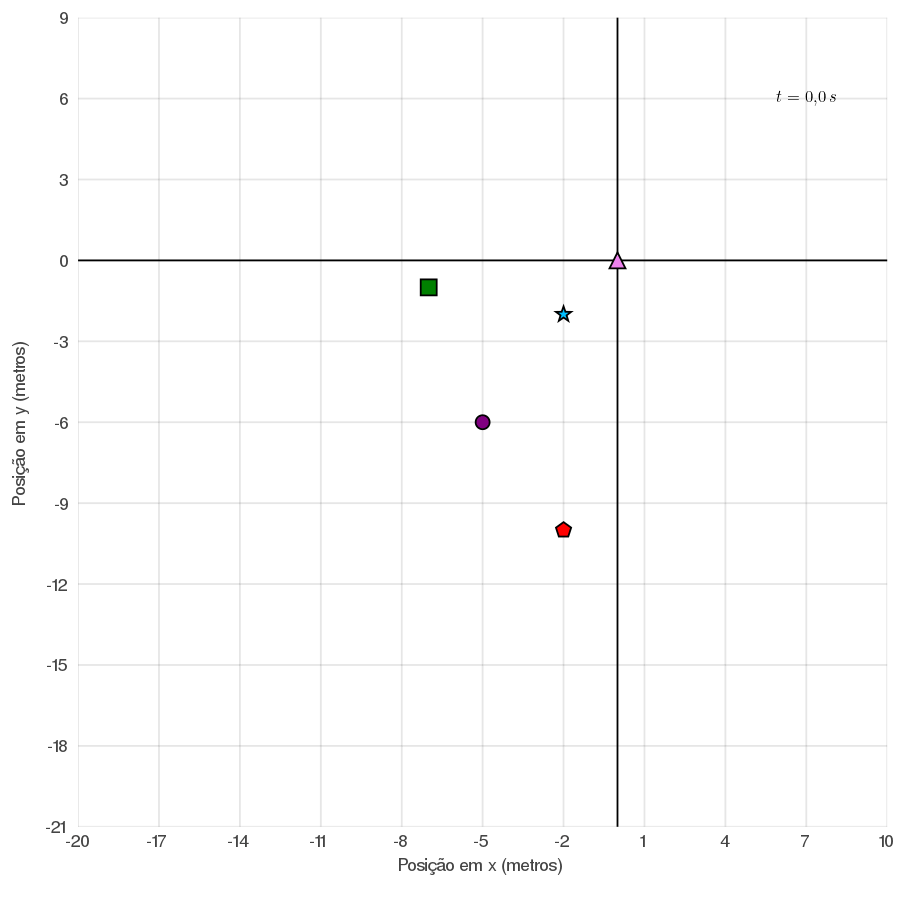

In [15]:
#calculando posições no novo referencial
ARef = [A[1].-PRef[1][1],A[2].-PRef[2][1],A[3],A[4],A[5]]
BRef = [B[1].-PRef[1][1],B[2].-PRef[2][1],B[3],B[4],B[5]]
CRef = [C[1].-PRef[1][1],C[2].-PRef[2][1],C[3],C[4],C[5]]
ORef = [O[1].-PRef[1][1],O[2].-PRef[2][1],O[3],O[4],O[5]]

#definindo strings e anotaçoes que serão mostradas no gráfico
strA = StringPos(ARef,tempo[1],tempo[end])    
ann_A = [(ARef[1][1]-4, ARef[2][1]-1, text(strA[1],halign = :left, pointsize = 11, color = ARef[4])),
    (ARef[1][end]-4, ARef[2][end]+1, text(strA[2],halign = :left, pointsize = 11, color = ARef[4]))]

strB = StringPos(BRef, tempo[1],tempo[end])
ann_B = [(BRef[1][1]-4, BRef[2][1]-1, text(strB[1],halign = :left, pointsize = 11, color = BRef[4])),
    (BRef[1][end]-4, BRef[2][end]+1, text(strB[2],halign = :left, pointsize = 11, color = BRef[4]))]

strC = StringPos(CRef, tempo[1], tempo[end])
ann_C = [(CRef[1][1]-4, CRef[2][1]+1, text(strC[1], halign = :left, pointsize = 11, color = CRef[4])),
    (CRef[1][end]-4, CRef[2][end]-1, text(strC[2],halign = :left, pointsize = 11, color = CRef[4]))]


ann_Ref = [(-1.5,1, text("Referencial", halign = :left, pointsize = 11, color = PRef[4])),
    (-2.5, -1, text(strRef[1], halign = :left, pointsize = 11, color = PRef[4]))]

strO = StringPos(ORef,tempo[1],tempo[end])
ann_O = [(-1-PRef[1][1],1-PRef[2][1], text("Ponto O", halign = :left, pointsize = 11, color = O[4])),
    (-2.5-PRef[1][1], -1-PRef[2][1], text(strO[1], halign = :left, pointsize = 11, color = ORef[4]))]

#ajustando escala dos eixos x e y
xmin = -15-PRef[1][1]
xmax = 15-PRef[1][1]
ymin = -15-PRef[2][1]
ymax = 15-PRef[2][1]

#criando animação
@gif for i = 1:3:100
        strtempo = latexstring("t = ", round(tempo[i]; digits = 2), "\\, s")
        strtempo = replace(strtempo, "." => ",\\!")
        ann = [(12-PRef[1][1],12-PRef[2][1], text(strtempo, pointsize = 12))]
        #println(ann)
        scatter(ORef[1],ORef[2], xaxis = (xlabel, (xmin,xmax), xmin:3:xmax, font(12)),
        yaxis = (ylabel, (ymin,ymax), ymin:3:ymax, font(12)), legend = :none, 
        markershape = ORef[3], color = ORef[4], ann = ann)
    
        scatter!([0],[0], markershape = PRef[3], color = PRef[4], legend = :none)
    
        scatter!([ARef[1][i]],[ARef[2][i]], markershape = ARef[3], color = ARef[4])
        plot!(ARef[1][1:i], ARef[2][1:i], lw = 3, color = ARef[4], linestyle = :dash, linealpha = 0.5)
    
        scatter!([BRef[1][i]],[BRef[2][i]], markershape = BRef[3], color = BRef[4])
        plot!(BRef[1][1:i], BRef[2][1:i], lw = 3, color = BRef[4], linestyle = :dash, linealpha = 0.5)
    
        scatter!([CRef[1][i]],[CRef[2][i]], markershape = CRef[3], color = CRef[4])
        plot!(CRef[1][1:i], CRef[2][1:i], lw = 3, color = CRef[4], linestyle = :dash, linealpha = 0.5)  
end

Não parece que houve mudança na trajetória dos objetos no novo referencial. Os deslocamentos de cada um dos objetos no novo referencial são mostrados abaixo.

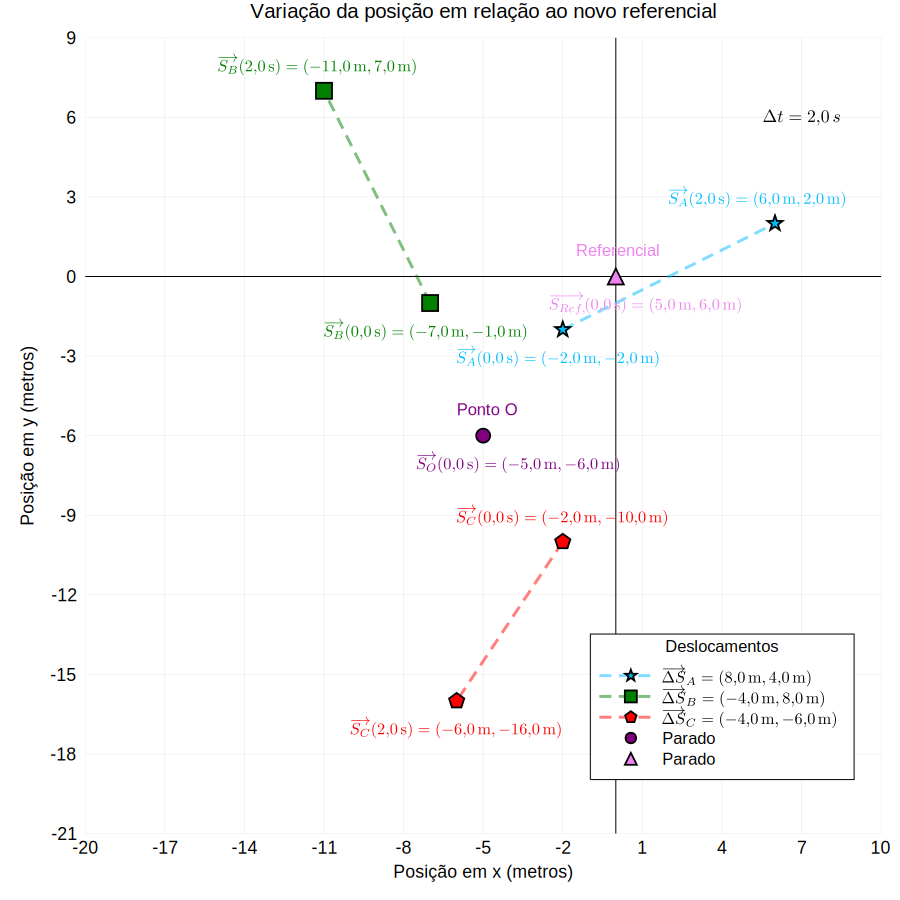

In [16]:
#desenhando gráfico com os pontos iniciais e finais de cada um dos objetos, e os deslocamentos.
plot([ARef[1][1],ARef[1][end]],[ARef[2][1],ARef[2][end]],xaxis = (xlabel,(xmin,xmax),xmin:3:xmax, font(12)), 
    yaxis = (ylabel, (ymin,ymax), ymin:3:ymax, font(12)), markershape = ARef[3], color = ARef[4], 
    lw = 3, ls = :dash, linealpha = 0.5, label = strA[3])
plot!([BRef[1][1],BRef[1][end]],[BRef[2][1],BRef[2][end]], markershape = BRef[3], color = BRef[4], 
    lw = 3, ls = :dash, linealpha = 0.5, label = strB[3])
plot!([CRef[1][1],CRef[1][end]],[CRef[2][1],CRef[2][end]], markershape = CRef[3], color = CRef[4], 
    lw = 3, ls = :dash, linealpha = 0.5, label = strC[3])
scatter!(ORef[1],ORef[2], markershape = ORef[3], color = ORef[4], label = "Parado", 
    title = "Variação da posição em relação ao novo referencial", legendfontsize = 11, 
    legendtitle = "Deslocamentos\n", legend = :bottomright)
scatter!([0],[0], markershape = PRef[3], color = PRef[4], label = "Parado")

ann_t = [(12-PRef[1][1],12-PRef[2][1], text(strt, pointsize = 12))]

annotate!(ann_A) 
annotate!(ann_B)
annotate!(ann_C)
annotate!(ann_O)
annotate!(ann_Ref)
annotate!(ann_t)


As posições iniciais e finais de cada um dos objetos mudaram juntos com a mudança de referencial, mas os deslocamentos permaneceram os mesmos. Como o intervalo de tempo também permaneceu o mesmo, podemos dizer que as velocidades médias dos objetos também não variou. Isso acontece, porque apesar da mudança de referêncial, o referencial do observador O e o novo referêncial estão parados entre si. Referenciais com velocidades iguais observam deslocamentos e velocidades iguais.

Mas o que acontece se colocarmos o referêncial em um dos objetos que está em movimento?

┌ Info: Saved animation to 
│   fn = /home/ghralima/Codes/Notebooks/mecanica/tmp.gif
└ @ Plots /home/ghralima/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/ghralima/Codes/Notebooks/mecanica/tmp.gif")
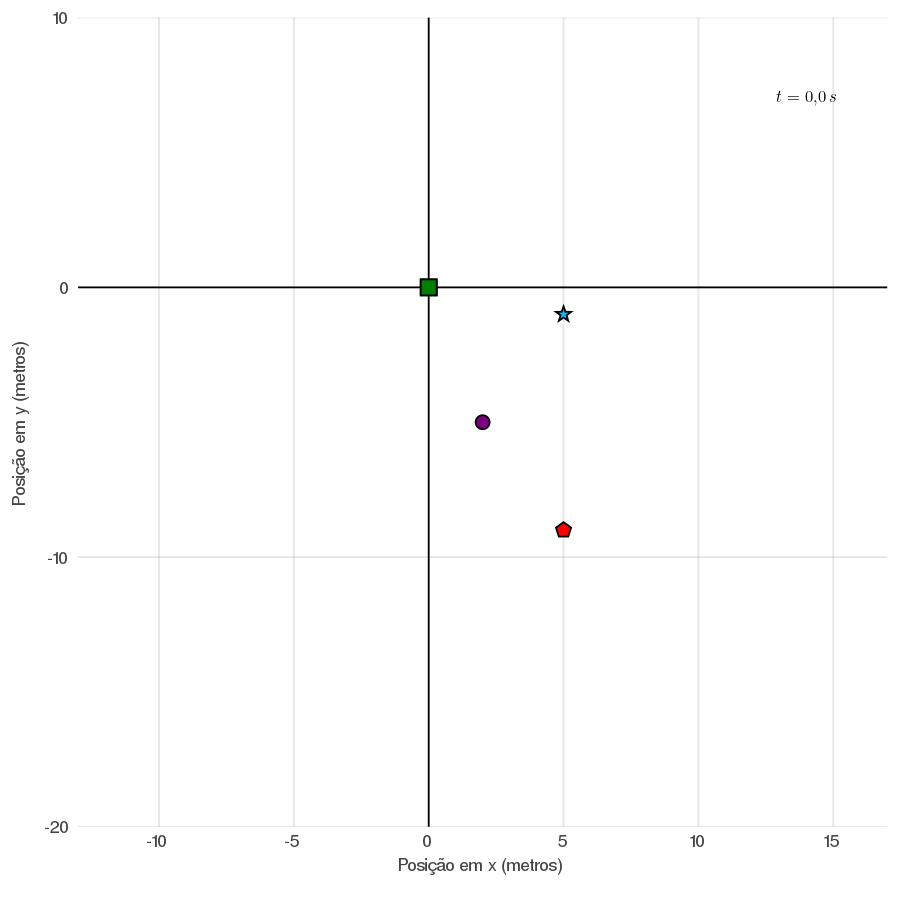

In [91]:
#escolhendo novo ponto de referência
PRef = B

#calculando as novas trajetórias dos pontos em relação ao novo ponto de referência
ARef = [A[1].-PRef[1],A[2].-PRef[2],A[3],A[4],A[5]]
BRef = [B[1].-PRef[1],B[2].-PRef[2],B[3],B[4],B[5]]
CRef = [C[1].-PRef[1],C[2].-PRef[2],C[3],C[4],C[5]]
ORef = [O[1].-PRef[1],O[2].-PRef[2],O[3],O[4],O[5]]

#criando animação
@gif for i = 1:3:100
    
    # mudando escala dos eixos do gráfico para acompanhar o ponto de referência
    xmax = 15-PRef[1][i]
    xmin = -15-PRef[1][i]
    ymax = 15-PRef[2][i]
    ymin = -15-PRef[2][i]
    
    # string temporal com coordenadas variando para permanecer sempre na mesma posição relativa no gráfico
    strtempo = latexstring("t = ", round(tempo[i]; digits = 2), "\\, s")
    strtempo = replace(strtempo, "." => ",\\!")
    ann = [(12-PRef[1][i],12-PRef[2][i], text(strtempo, pointsize = 12))]
        
    # gráficos
    scatter([0],[0], xaxis = (xlabel, (xmin,xmax), font(12)), yaxis = (ylabel, (ymin,ymax), font(12)), 
        legend = :none, markershape = PRef[3], color = PRef[4], ann = ann, size = (900,900))
    
    scatter!([ORef[1][i]],[ORef[2][i]], markershape = ORef[3], color = ORef[4])
    plot!(ORef[1][1:i], ORef[2][1:i], lw = 3, color = ORef[4], linestyle = :dash, linealpha = 0.5)
    
    scatter!([ARef[1][i]],[ARef[2][i]], markershape = ARef[3], color = ARef[4])
    plot!(ARef[1][1:i], ARef[2][1:i], lw = 3, color = ARef[4], linestyle = :dash, linealpha = 0.5)
    
    scatter!([BRef[1][i]],[BRef[2][i]], markershape = BRef[3], color = BRef[4])
    plot!(BRef[1][1:i], BRef[2][1:i], lw = 3, color = BRef[4], linestyle = :dash, linealpha = 0.5)
    
    scatter!([CRef[1][i]],[CRef[2][i]], markershape = CRef[3], color = CRef[4])
    plot!(CRef[1][1:i], CRef[2][1:i], lw = 3, color = CRef[4], linestyle = :dash, linealpha = 0.5)  
end

Pode-se notar que ao colocar o referencial em um objeto em movimento, tanto as posições quanto os deslocamentos mudaram. Os deslocamentos em relação ao novo ponto de referência podem ser vistos na próxima figura. 

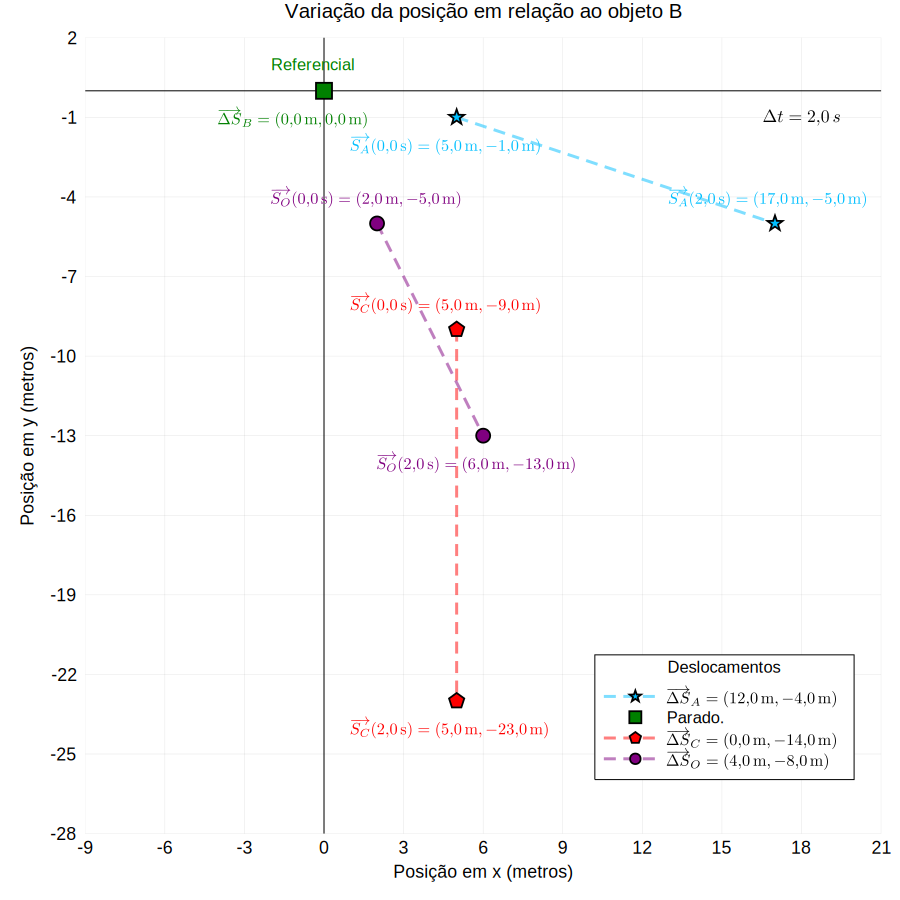

In [92]:
#criando novas strings e anotações com as novas posições
strA = StringPos(ARef,tempo[1],tempo[end])    
ann_A = [(ARef[1][1]-4, ARef[2][1]-1, text(strA[1],halign = :left, pointsize = 11, color = ARef[4])),
    (ARef[1][end]-4, ARef[2][end]+1, text(strA[2],halign = :left, pointsize = 11, color = ARef[4]))]

strB = StringPos(BRef, tempo[1],tempo[end])
ann_B = [(BRef[1][1]-4, BRef[2][1]-1, text(strB[1],halign = :left, pointsize = 11, color = BRef[4])),
    (BRef[1][end]-4, BRef[2][end]+1, text(strB[2],halign = :left, pointsize = 11, color = BRef[4]))]

strC = StringPos(CRef, tempo[1], tempo[end])
ann_C = [(CRef[1][1]-4, CRef[2][1]+1, text(strC[1], halign = :left, pointsize = 11, color = CRef[4])),
    (CRef[1][end]-4, CRef[2][end]-1, text(strC[2],halign = :left, pointsize = 11, color = CRef[4]))]

ann_Ref = [(-1.5,1, text("Referencial", halign = :left, pointsize = 11, color = PRef[4])),
    (-2.5, -1, text(strRef[1], halign = :left, pointsize = 11, color = PRef[4]))]

strO = StringPos(ORef,tempo[1],tempo[end])
ann_O = [(ORef[1][1]-4,ORef[2][1]+1, text(strO[1], halign = :left, pointsize = 11, color = ORef[4])),
    (ORef[1][end]-4, ORef[2][end]-1, text(strO[2], halign = :left, pointsize = 11, color = ORef[4]))]

ann_t = [(12-PRef[1][end],12-PRef[2][end], text(strt, pointsize = 12))]

#definindo escalas dos eixos x e y
xmax = 15-PRef[1][end]
xmin = -15-PRef[1][end]
ymax = 15-PRef[2][end]
ymin = -15-PRef[2][end]

#teste para ver se o ponto A é o referencial e ajustar legendas e anotações do gráfico
if (ARef[1][end]==ARef[1][1]) & (ARef[2][end]==ARef[2][1])
    scatter([ARef[1][1]],[ARef[2][1]],xaxis = (xlabel,(xmin,xmax),xmin:3:xmax, font(12)), 
       yaxis = (ylabel, (ymin,ymax), ymin:3:ymax, font(12)), markershape = ARef[3], color = ARef[4], 
       size = (900,900), label = "Parado.")
    
    ann_A = [(ARef[1][1]-4, ARef[2][1]-1, text(strA[3],halign = :left, pointsize = 11, color = ARef[4])),
        (ARef[1][end]-2, ARef[2][end]+1, text("Referencial",halign = :left, pointsize = 11, color = ARef[4]))]
    annotate!(ann_A)
else
    plot([ARef[1][1],ARef[1][end]],[ARef[2][1],ARef[2][end]],xaxis = (xlabel,(xmin,xmax),xmin:3:xmax, font(12)), 
       yaxis = (ylabel, (ymin,ymax), ymin:3:ymax, font(12)), markershape = ARef[3], color = ARef[4], 
       lw = 3, ls = :dash, linealpha = 0.5, label = strA[3])
    annotate!(ann_A)
end

#teste para ver se o ponto B é o referencial e ajustar legendas e anotações do gráfico
if (BRef[1][end]==BRef[1][1]) & (BRef[2][end]==BRef[2][1])
    scatter!([BRef[1][1]],[BRef[2][1]],markershape = BRef[3], color = BRef[4], label = "Parado.")
    ann_B = [(BRef[1][1]-4, BRef[2][1]-1, text(strB[3],halign = :left, pointsize = 11, color = BRef[4])),
        (BRef[1][end]-2, BRef[2][end]+1, text("Referencial",halign = :left, pointsize = 11, color = BRef[4]))]
    annotate!(ann_B)
else
    plot!([BRef[1][1],BRef[1][end]],[BRef[2][1],BRef[2][end]], markershape = BRef[3], color = BRef[4], 
       lw = 3, ls = :dash, linealpha = 0.5, label = strB[3])
    annotate!(ann_B)
end

#teste para ver se o ponto C é o referencial e ajustar legendas e anotações do gráfico
if (CRef[1][end]==CRef[1][1]) & (CRef[2][end]==CRef[2][1])
    scatter!([CRef[1][1]],[CRef[2][1]],markershape = CRef[3], color = CRef[4], label = "Parado.")
    ann_C = [(CRef[1][1]-4, CRef[2][1]-1, text(strC[3],halign = :left, pointsize = 11, color = CRef[4])),
        (CRef[1][end]-2, CRef[2][end]+1, text("Referencial",halign = :left, pointsize = 11, color = CRef[4]))]
    annotate!(ann_C)
else
    plot!([CRef[1][1],CRef[1][end]],[CRef[2][1],CRef[2][end]], markershape = CRef[3], color = CRef[4], 
       lw = 3, ls = :dash, linealpha = 0.5, label = strC[3])
    annotate!(ann_C)  
end
    
#movimento relativo do observador O
plot!([ORef[1][1],ORef[1][end]],[ORef[2][1],ORef[2][end]], markershape = ORef[3], color = ORef[4], 
    lw = 3, ls = :dash, linealpha = 0.5, label = strO[3], 
    title = string("Variação da posição em relação ao objeto ", PRef[5]), legendfontsize = 11, 
    legendtitle = "Deslocamentos\n", ann = ann_O, legend = :bottomright)

#anotando intervalo de tempo
annotate!(ann_t)

In [94]:
#Calculando as velocidades relativas entre os objetos e o referencial
vAR = [(ARef[1][end]-ARef[1][1])/(tempo[end] - tempo[1]),(ARef[2][end]-ARef[2][1])/(tempo[end] - tempo[1])]
vBR = [(BRef[1][end]-BRef[1][1])/(tempo[end] - tempo[1]),(BRef[2][end]-BRef[2][1])/(tempo[end] - tempo[1])]
vCR = [(CRef[1][end]-CRef[1][1])/(tempo[end] - tempo[1]),(CRef[2][end]-CRef[2][1])/(tempo[end] - tempo[1])]
vOR = [(ORef[1][end]-ORef[1][1])/(tempo[end] - tempo[1]),(ORef[2][end]-ORef[2][1])/(tempo[end] - tempo[1])]

#String descrevendo o deslocamento do objeto A
deslocAstr = string("O objeto ",ARef[5]," se deslocou em relação ao objeto ",PRef[5],": \n", 
    round(ARef[1][end]-ARef[1][1], digits = 2)," m na direção x, e ", 
    round(ARef[2][end]-ARef[2][1], digits = 2), " m na direção y, em um intervalo de tempo Δt = ", 
    round(tempo[end]-tempo[1]; digits = 2)," s.\n")
#String descrevendo a velocidade média do objeto A
vAstr = string("A velocidade média de ",ARef[5]," em relação ao objeto ",PRef[5]," é de:\n",
    vAR[1]," m/s na direção x, e ", vAR[2]," m/s na direção y.\n\n")

#Strings descrevendo o deslocamento do objeto B
deslocBstr = string("O objeto ",BRef[5]," se deslocou em relação ao objeto ",PRef[5],": \n", 
    round(BRef[1][end]-BRef[1][1], digits = 2)," m na direção x, e ", 
    round(BRef[2][end]-BRef[2][1], digits = 2), " m na direção y, em um intervalo de tempo Δt = ", 
    round(tempo[end]-tempo[1]; digits = 2)," s.\n")
#String descrevendo a velocidade média do objeto B
vBstr = string("A velocidade média de ",BRef[5]," em relação ao objeto ",PRef[5]," é de:\n",
    vBR[1]," m/s na direção x, e ", vBR[2]," m/s na direção y.\n\n")

#Strings descrevendo o deslocamento do objeto C
deslocCstr = string("O objeto ",CRef[5]," se deslocou em relação ao objeto ",PRef[5],": \n", 
    round(CRef[1][end]-CRef[1][1], digits = 2)," m na direção x, e ", 
    round(CRef[2][end]-CRef[2][1], digits = 2), " m na direção y, em um intervalo de tempo Δt = ", 
    round(tempo[end]-tempo[1]; digits = 2)," s.\n")
#String descrevendo a velocidade média do objeto C
vCstr = string("A velocidade média de ",CRef[5]," em relação ao objeto ",PRef[5]," é de:\n",
    vCR[1]," m/s na direção x, e ", vCR[2]," m/s na direção y.\n\n")

#Strings descrevendo o deslocamento do objeto O
deslocOstr = string("O objeto ",ORef[5]," se deslocou em relação ao objeto ",PRef[5],": \n", 
    round(ORef[1][end]-ORef[1][1], digits = 2)," m na direção x, e ", 
    round(ORef[2][end]-ORef[2][1], digits = 2), " m na direção y, em um intervalo de tempo Δt = ", 
    round(tempo[end]-tempo[1]; digits = 2)," s.\n")
#String descrevendo a velocidade média do objeto O
vOstr = string("A velocidade média de ",ORef[5]," em relação ao objeto ",PRef[5]," é de:\n",
    vOR[1]," m/s na direção x, e ", vOR[2]," m/s na direção y.\n")

#Mostrando deslocamentos e velocidades
println(deslocAstr)
println(vAstr)
println(deslocBstr)
println(vBstr)
println(deslocCstr)
println(vCstr)
println(deslocOstr)
println(vOstr)

O objeto A se deslocou em relação ao objeto B: 
12.0 m na direção x, e -4.0 m na direção y, em um intervalo de tempo Δt = 2.0 s.

A velocidade média de A em relação ao objeto B é de:
6.0 m/s na direção x, e -2.0 m/s na direção y.


O objeto B se deslocou em relação ao objeto B: 
0.0 m na direção x, e 0.0 m na direção y, em um intervalo de tempo Δt = 2.0 s.

A velocidade média de B em relação ao objeto B é de:
0.0 m/s na direção x, e 0.0 m/s na direção y.


O objeto C se deslocou em relação ao objeto B: 
0.0 m na direção x, e -14.0 m na direção y, em um intervalo de tempo Δt = 2.0 s.

A velocidade média de C em relação ao objeto B é de:
0.0 m/s na direção x, e -7.0 m/s na direção y.


O objeto O se deslocou em relação ao objeto B: 
4.0 m na direção x, e -8.0 m na direção y, em um intervalo de tempo Δt = 2.0 s.

A velocidade média de O em relação ao objeto B é de:
2.0 m/s na direção x, e -4.0 m/s na direção y.



Ao mudarmos o referencial para um objeto que estava em movimento em relação ao referencial inicial, os deslocamentos de cada um dos objetos variou, e, portanto, as velocidades também. O deslocamento e a velocidade dependem do referencial!

Não é necessário conhecer as trajetórias dos objetos para calcular as velocidades relativas entre eles, precisamos apenas conhecer as velocidades de cada um no mesmo referencial. Se $\vec{v_1}$ e $\vec{v_2}$ são as velocidades dos objetos 1 e 2 em relação a um certo referencial, a velocidade do objeto 1 no referencial do objeto 2 ($\overrightarrow{v_{12}}$) pode ser calculada como:

$$\overrightarrow{v_{12}} = \overrightarrow{v_1} - \overrightarrow{v_2}.$$

As velocidades relativas de cada um dos objetos em relação ao referencial do Observador O, e em relação ao referencial em movimento podem ser comparadas nos gráficos de velocidade abaixo.

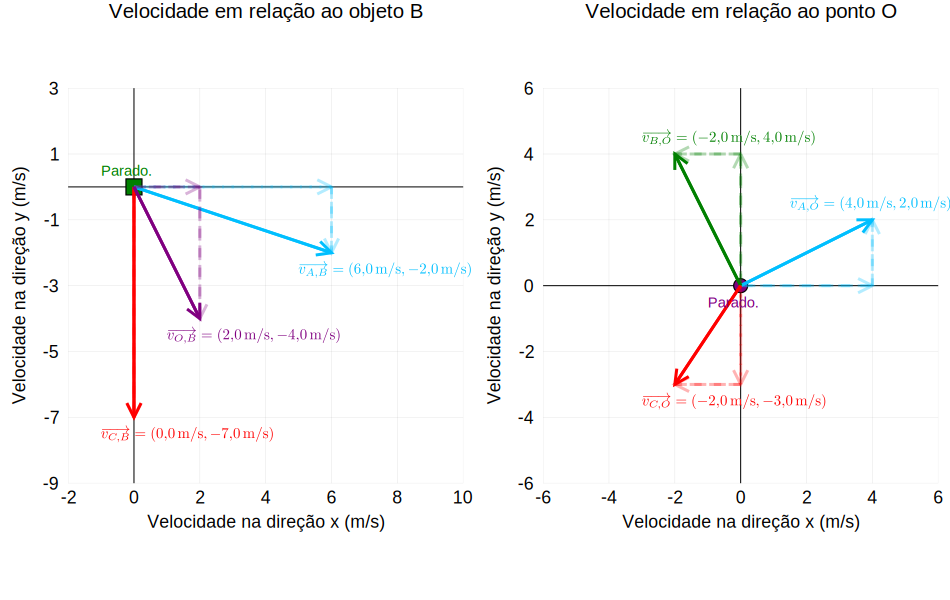

In [95]:
xlabel = "Velocidade na direção x (m/s)"
ylabel = "Velocidade na direção y (m/s)"
ptitle1 = string("Velocidade em relação ao objeto ", PRef[5])
ptitle2 = string("Velocidade em relação ao ponto O")

function StringVel(X::Array,XRef::Array,Obj::String)::String
    if XRef[5] == Obj
        velstr = "Parado."
    else
        velstr = latexstring("\\overrightarrow{v_{",Obj,",",XRef[5],"}} = (", X[1], "\\,\\mathrm{m/s},",
           X[2], "\\,\\mathrm{m/s})")
        velstr = replace(velstr,"." => ",\\!")
    end
    return velstr
end

strvAR = StringVel(vAR,PRef,"A")
strvBR = StringVel(vBR,PRef,"B")
strvCR = StringVel(vCR,PRef,"C")
strvOR = StringVel(vOR,PRef,"O")

annAR = [(vAR[1]-1, vAR[2]-0.5, text(strvAR, pointsize = 10, halign = :left, color = ARef[4]))]
annBR = [(vBR[1]-1, vBR[2]+0.5, text(strvBR, pointsize = 10, halign = :left, color = BRef[4]))]
annCR = [(vCR[1]-1, vCR[2]-0.5, text(strvCR, pointsize = 10, halign = :left, color = CRef[4]))]
annOR = [(vOR[1]-1, vOR[2]-0.5, text(strvOR, pointsize = 10, halign = :left, color = ORef[4]))]

xmin = min(vAR[1],vBR[1],vCR[1],vOR[1]) - 2
xmax = xmin + 12
ymin = min(vAR[2],vBR[2],vCR[2],vOR[2]) - 2
ymax = ymin + 12

p1 = scatter([0],[0],xaxis = (xlabel, (xmin,xmax), xmin:2:xmax, font(12)),
        yaxis = (ylabel, (ymin,ymax), ymin:2:ymax, font(12)), title = ptitle1, 
        legend = :none, color = PRef[4], shape = PRef[3])

#scatter!([vBR[1]],[vBR[2]],shape = BRef[3], color = BRef[4])
#scatter!([vCR[1]],[vCR[2]],shape = CRef[3], color = CRef[4], ann = annCR)
#scatter!([vOR[1]],[vOR[2]],shape = ORef[3], color = ORef[4], ann = annOR)

quiver!([0],[0],quiver = ([vAR[1]],[0]), lw = 3, ls = :dash, color = ARef[4], la = 0.3)
quiver!([vAR[1]],[0],quiver = ([0],[vAR[2]]), lw = 3, ls = :dash, color = ARef[4], la = 0.3)
quiver!([0],[0],quiver = ([vAR[1]],[vAR[2]]), lw = 3, color = ARef[4], ann = annAR)

quiver!([0],[0],quiver = ([0],[vBR[2]]), lw = 3, ls = :dash, color = BRef[4], la = 0.3)
quiver!([0],[vBR[2]],quiver = ([vBR[1]],[0]), lw = 3, ls = :dash, color = BRef[4], la = 0.3)
quiver!([0],[0],quiver = ([vBR[1]],[vBR[2]]), lw = 3, color = BRef[4], ann = annBR)

quiver!([0],[0],quiver = ([0],[vCR[2]]), lw = 3, ls = :dash, color = CRef[4], la = 0.3)
quiver!([0],[vCR[2]],quiver = ([vCR[1]],[0]), lw = 3, ls = :dash, color = CRef[4], la = 0.3)
quiver!([0],[0],quiver = ([vCR[1]],[vCR[2]]), lw = 3, color = CRef[4], ann = annCR)

quiver!([0],[0],quiver = ([vOR[1]],[0]), lw = 3, ls = :dash, color = ORef[4], la = 0.3)
quiver!([vOR[1]],[0],quiver = ([0],[vOR[2]]), lw = 3, ls = :dash, color = ORef[4], la = 0.3)
quiver!([0],[0],quiver = ([vOR[1]],[vOR[2]]), lw = 3, color = ORef[4], ann = annOR)

strvA = StringVel(vA,O,"A")
strvB = StringVel(vB,O,"B")
strvC = StringVel(vC,O,"C")
#strvO = StringVel([[0],[0]],O,"O")

annA = [(vA[1]-2.5, vA[2]+0.5, text(strvA, pointsize = 10, halign = :left, color = ARef[4]))]
annB = [(vB[1]-1, vB[2]+0.5, text(strvB, pointsize = 10, halign = :left, color = BRef[4]))]
annC = [(vC[1]-1, vC[2]-0.5, text(strvC, pointsize = 10, halign = :left, color = CRef[4]))]
annO = [(-1, -0.5, text("Parado.", pointsize = 10, halign = :left, color = ORef[4]))]

p2 = scatter([0],[0], xaxis = (xlabel, (-6,6), -6:2:6, font(12)),
        yaxis = (ylabel, (-6,6), -6:2:6, font(12)), shape = O[3], color = O[4], title = ptitle2,
        ann = annO, legend = :none)

#scatter!([vB[1]],[vB[2]],shape = B[3], color = B[4], label = strvB)
#scatter!([vC[1]],[vC[2]],shape = C[3], color = C[4], label = strvC)
#scatter!([0],[0],shape = O[3], color = O[4], label = "Parado.")

quiver!([0],[0],quiver = ([vA[1]],[0]), lw = 3, ls = :dash, color = A[4], la = 0.3)
quiver!([vA[1]],[0],quiver = ([0],[vA[2]]), lw = 3, ls = :dash, color = A[4], la = 0.3)
quiver!([0],[0],quiver = ([vA[1]],[vA[2]]), lw = 3, color = A[4], ann = annA)

quiver!([0],[0],quiver = ([0],[vB[2]]), lw = 3, ls = :dash, color = B[4], la = 0.3)
quiver!([0],[vB[2]],quiver = ([vB[1]],[0]), lw = 3, ls = :dash, color = B[4], la = 0.3)
quiver!([0],[0],quiver = ([vB[1]],[vB[2]]), lw = 3, color = B[4], ann = annB)

quiver!([0],[0],quiver = ([0],[vC[2]]), lw = 3, ls = :dash, color = C[4], la = 0.3)
quiver!([0],[vC[2]],quiver = ([vC[1]],[0]), lw = 3, ls = :dash, color = C[4], la = 0.3)
quiver!([0],[0],quiver = ([vC[1]],[vC[2]]), lw = 3, color = C[4], ann = annC)


plot(p1,p2, size = (950,600))

Podemos definir uma grandeza chamada rapidez (rpd) que representa o módulo do vetor velocidade,

$$\mathrm{rpd} = |\vec{v}|.$$

Para o caso de uma velocidade em 2-dimensões como nos exemplos acima, utilizamos o Teorema de Pitágoras para calcular a rapidez:

$$\mathrm{rpd} = \sqrt{{v_x}^2 + {v_y}^2}.$$

Por ser módulo, a rapidez é uma grandeza escalar e, por isto, sempre positiva!

In [187]:
rpdAR = hypot(vAR[1],vAR[2])
strrpdAR = string("Rapidez de A em relação ao referêncial de ",PRef[5]," é: ", round(rpdAR, digits = 2), " m/s.\n")
strrpdAR = replace(strrpdAR, "." => ",", count = 1)

rpdBR = hypot(vBR[1],vBR[2])
strrpdBR = string("Rapidez de B em relação ao referêncial de ",PRef[5]," é: ", round(rpdBR, digits = 2), " m/s.\n")
strrpdBR = replace(strrpdBR, "." => ",", count = 1)

rpdCR = hypot(vCR[1],vCR[2])
strrpdCR = string("Rapidez de C em relação ao referêncial de ",PRef[5]," é: ", round(rpdCR, digits = 2), " m/s.\n")
strrpdCR = replace(strrpdCR, "." => ",", count = 1)

rpdOR = hypot(vOR[1],vOR[2])
strrpdOR = string("Rapidez de O em relação ao referêncial de ",PRef[5]," é: ", round(rpdOR, digits = 2), " m/s.\n")
strrpdOR = replace(strrpdOR, "." => ",", count = 1)

println(strrpdAR)
println(strrpdBR)
println(strrpdCR)
println(strrpdOR)

Rapidez de A em relação ao referêncial de B é: 6,32 m/s.

Rapidez de B em relação ao referêncial de B é: 0,0 m/s.

Rapidez de C em relação ao referêncial de B é: 7,0 m/s.

Rapidez de O em relação ao referêncial de B é: 4,47 m/s.



Em todos os casos acima, as velocidades de cada um dos objetos foi constante, ou seja, cada objeto se moveu numa linha reta, sem mudar de sentido e sempre com a mesma rapidez. Quando isso acontece temos o famoso Movimento Retilíneo Uniforme (M.R.U.)!

Enquanto o objeto se move em M.R.U., sua velocidade em qualquer instante será igual à velocidade média, e sua rapidez será sempre igual ao módulo da velocidade média.

Se o objeto sempre se move sobre uma mesma linha reta, seu movimento pode ser considerado unidimensional, e não precisamos levar em consideração uma segunda dimensão do movimento. Dessa forma, a análise do movimento torna-se bem mais simples.